# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Colab Notebooks"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [3]:
# Dataset url
url= "/content/drive/MyDrive/Colab Notebooks/cartwheel.csv"


# Load the dataset
df = pd.read_csv(url)


# Exploring the content of the data set

Get a general 'feel' of the data


In [4]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             52 non-null     int64  
 1   Age            51 non-null     float64
 2   Gender         52 non-null     object 
 3   GenderGroup    52 non-null     int64  
 4   Glasses        52 non-null     object 
 5   GlassesGroup   52 non-null     int64  
 6   Height         51 non-null     float64
 7   Wingspan       51 non-null     float64
 8   CWDistance     52 non-null     int64  
 9   Complete       52 non-null     object 
 10  CompleteGroup  51 non-null     float64
 11  Score          52 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 5.0+ KB


,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [5]:
# Number of times that each distinct value of a variable occurs in a data set
df["Gender"].value_counts()


,count
Gender,
F,26
M,26


In [6]:
# Proportion of each distinct value of a variable occurs in a data set
df["Gender"].value_counts(normalize=True)


,proportion
Gender,
F,0.5
M,0.5


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [7]:
# Total number of observations
total_observations = len(df)
print(f"Total de observaciones en el dataset: {total_observations}")


# total number of null observations in Age
missing_values_age = df["Age"].isnull().sum()
print(f"Número total de valores nulos en Age: {missing_values_age}")
valid_values_age = df["Age"].notnull().sum()
print(f"Número total de valores en Age (excluyendo missing values): {valid_values_age}")

# Total number of counts in Age (excluding missing values)
print(f"Verificación: {missing_values_age} + {valid_values_age} = {total_observations}")



Total de observaciones en el dataset: 52
Número total de valores nulos en Age: 1
Número total de valores en Age (excluyendo missing values): 51
Verificación: 1 + 51 = 52


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

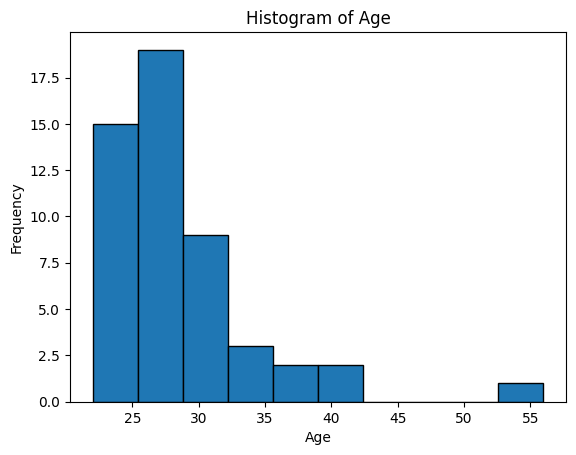

In [8]:
# Plot histogram of Age
import matplotlib.pyplot as plt

# Histograma de la columna Age
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

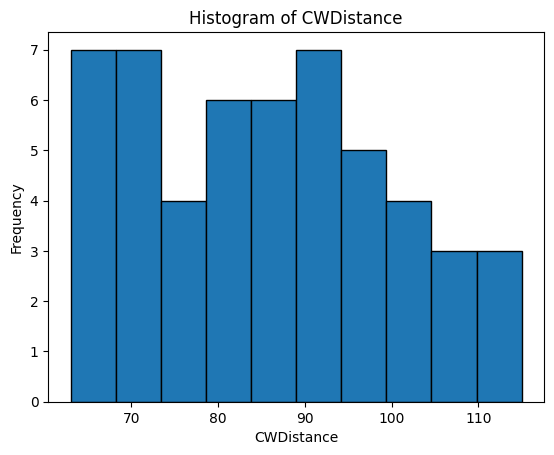

In [9]:
# Plot distribution of CWDistance
plt.hist(df["CWDistance"], bins=10, edgecolor="black")
plt.xlabel("CWDistance")
plt.ylabel("Frequency")
plt.title("Histogram of CWDistance")
plt.show()

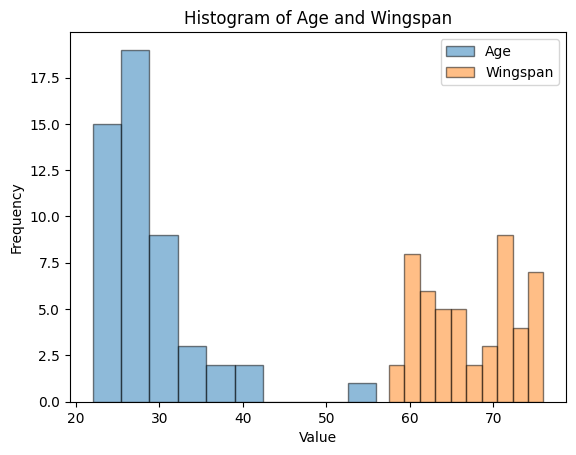

In [10]:
# Plot histogram of both the Age and the Wingspan
plt.hist(df["Age"], bins=10, alpha=0.5, label="Age", edgecolor="black")
plt.hist(df["Wingspan"], bins=10, alpha=0.5, label="Wingspan", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Age and Wingspan")
plt.legend()
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

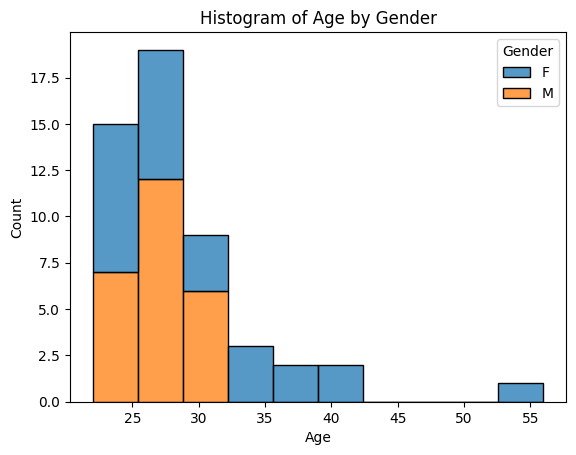

In [11]:
import seaborn as sns

# Crear histogramas de Age separados por Gender
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", bins=10)
plt.title("Histogram of Age by Gender")
plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

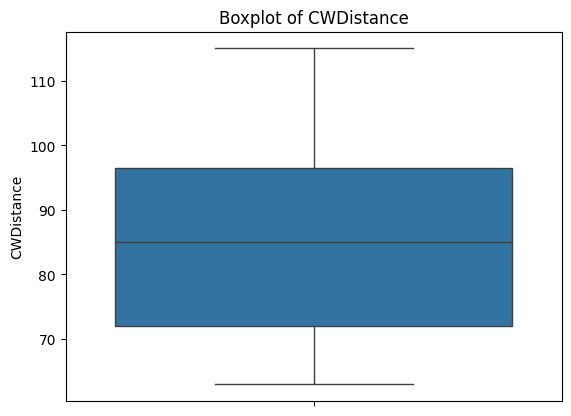

In [12]:
# Create the boxplot of the "CWDistance"
sns.boxplot(y=df["CWDistance"])
plt.title("Boxplot of CWDistance")
plt.show()

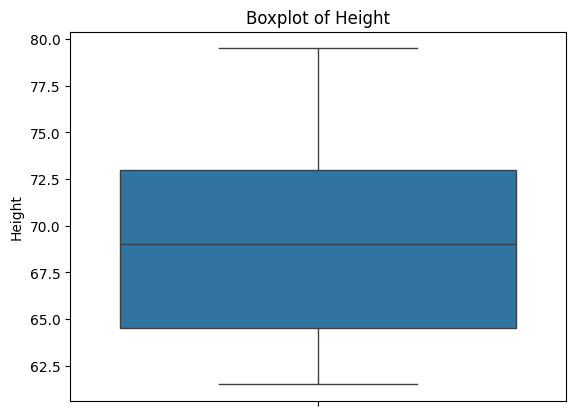

In [13]:
# Create the boxplot of the "Height"
sns.boxplot(y=df["Height"])
plt.title("Boxplot of Height")
plt.show()


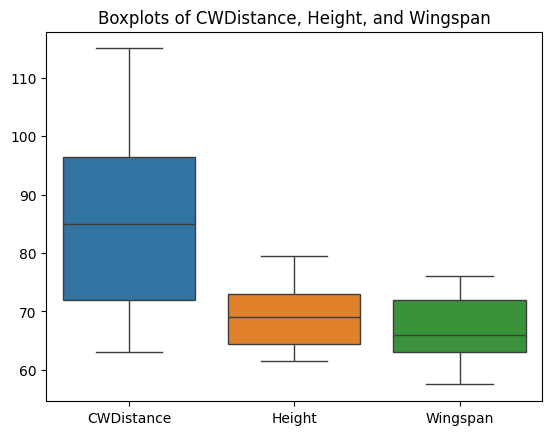

In [14]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
sns.boxplot(data=df[["CWDistance", "Height", "Wingspan"]])
plt.title("Boxplots of CWDistance, Height, and Wingspan")
plt.show()


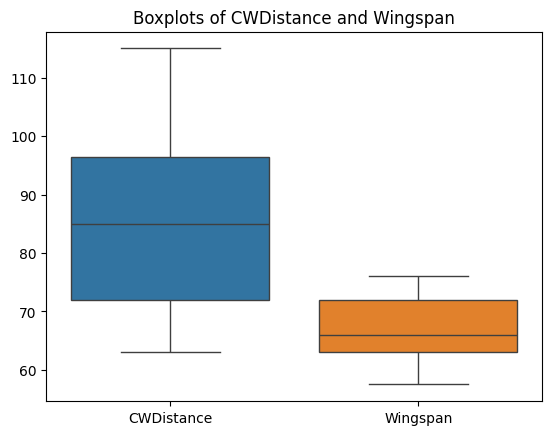

In [15]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"
sns.boxplot(data=df[["CWDistance", "Wingspan"]])
plt.title("Boxplots of CWDistance and Wingspan")
plt.show()


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

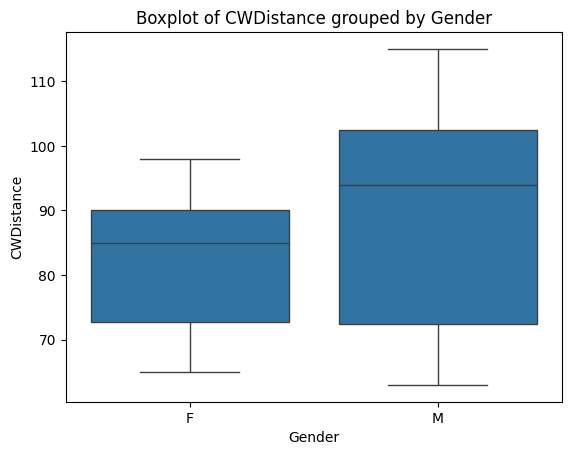

In [16]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
#sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)
sns.boxplot(data=df, x="Gender", y="CWDistance")
plt.title("Boxplot of CWDistance grouped by Gender")
plt.show()


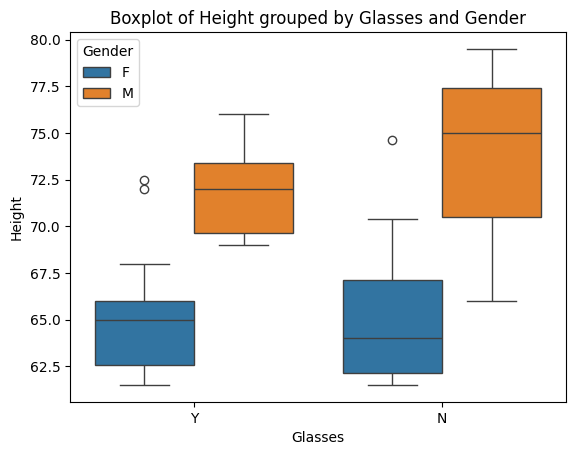

In [17]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
#sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")
plt.title("Boxplot of Height grouped by Glasses and Gender")
plt.show()



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


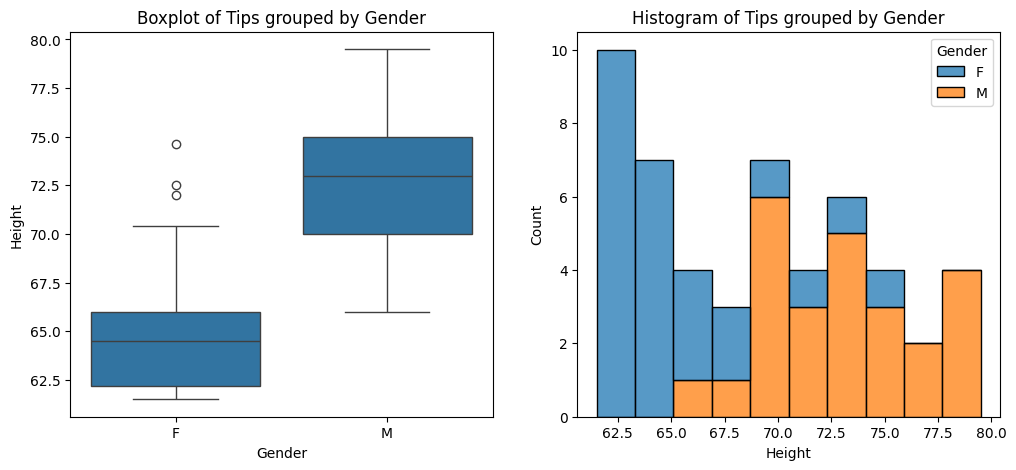

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x="Gender", y="Height", ax=axes[0])
axes[0].set_title("Boxplot of Tips grouped by Gender")

# Histograma
sns.histplot(data=df, x="Height", hue="Gender", multiple="stack", bins=10, ax=axes[1])
axes[1].set_title("Histogram of Tips grouped by Gender")

plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

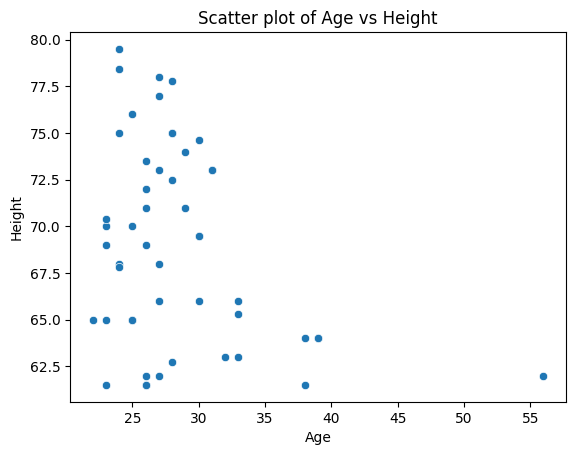

In [21]:
# scatter plot between two variables
# Scatter plot entre Age y Height
sns.scatterplot(data=df, x="Age", y="Height")
plt.title("Scatter plot of Age vs Height")
plt.show()

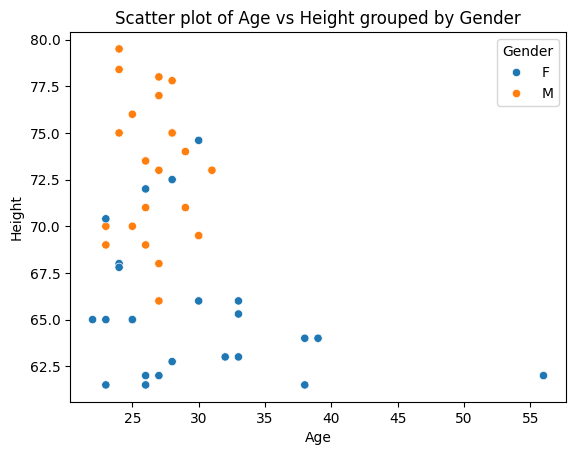

In [22]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x="Age", y="Height", hue="Gender")
plt.title("Scatter plot of Age vs Height grouped by Gender")
plt.show()

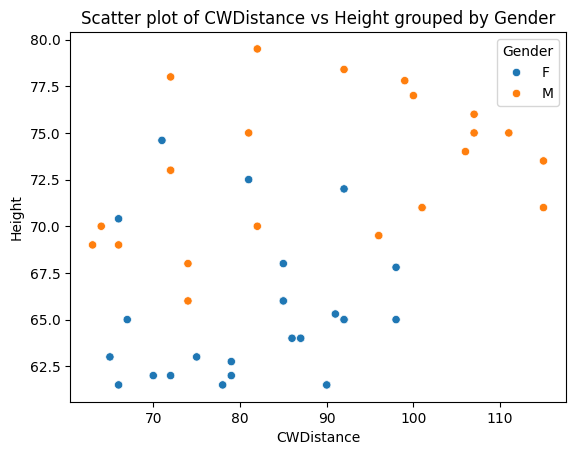

In [26]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data=df, x="CWDistance", y="Height", hue="Gender")
plt.title("Scatter plot of CWDistance vs Height grouped by Gender")
plt.show()

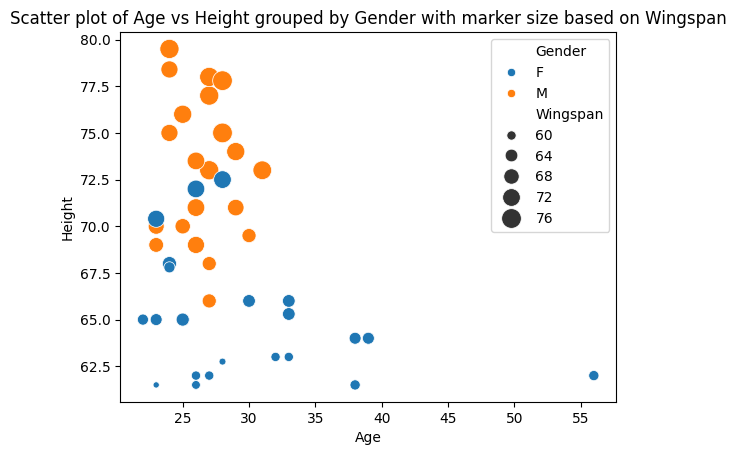

In [25]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(data=df, x="Age", y="Height", hue="Gender", size="Wingspan", sizes=(20, 200))
plt.title("Scatter plot of Age vs Height grouped by Gender with marker size based on Wingspan")
plt.show()

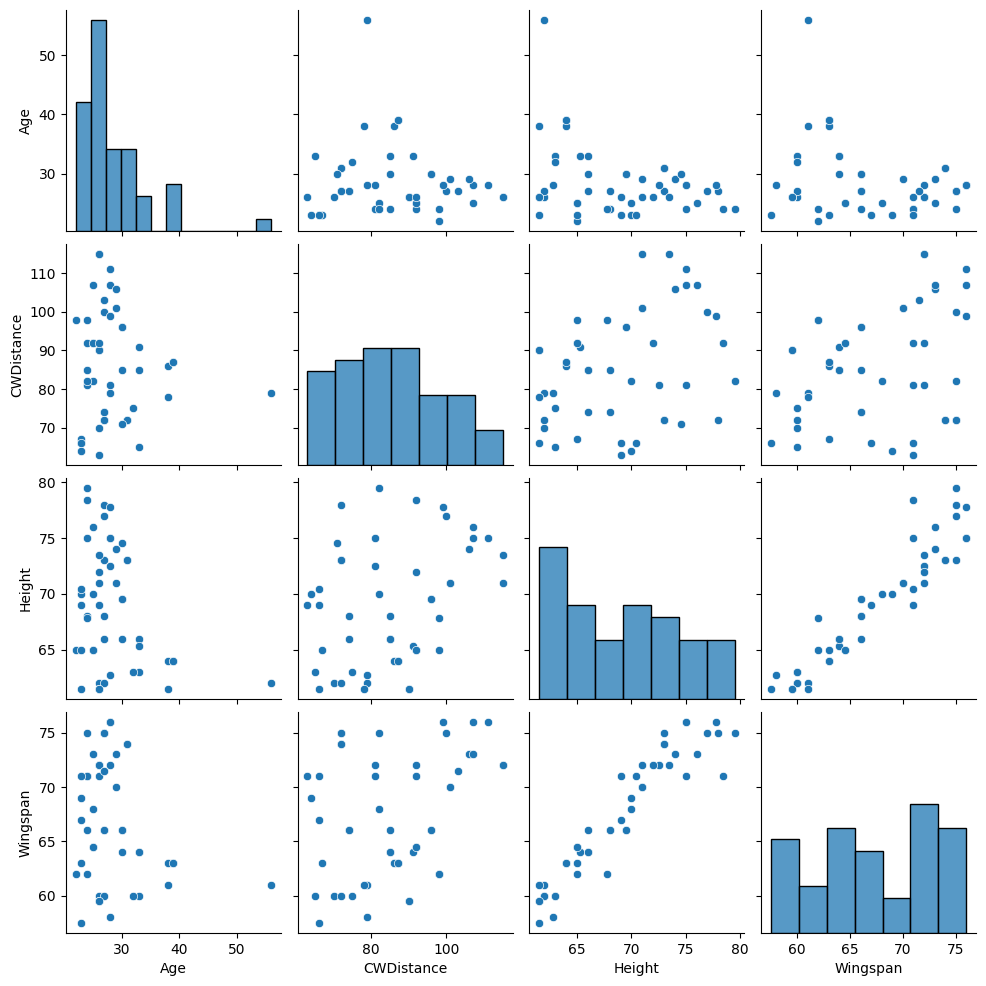

In [24]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'
sns.pairplot(df[["Age", "CWDistance", "Height", "Wingspan"]])
plt.show()


# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective
